# **Importes**

In [18]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../../")))

from src.main.utils.load_scenarios import load_scenario
from src.main.environment.food_delivery_gym_env import FoodDeliveryGymEnv

In [19]:
scnearios_path = os.path.abspath(os.path.join(os.getcwd(), "../../scenarios/"))
gym_env: FoodDeliveryGymEnv = load_scenario("complex.json", dir_path=scnearios_path)
tamanho_episodio = gym_env.num_orders
print(f"tamanho_episodio: {tamanho_episodio}")

tamanho_episodio: 576


# **Funções**

In [20]:
def carregar_log(dir_path, log="logs", nome_arquivo="monitor.csv", skiprows=1):
    """Carrega um arquivo CSV de log."""
    caminho = os.path.join(dir_path, log, nome_arquivo)
    return pd.read_csv(caminho, skiprows=skiprows)

def plotar_recompensa(recompensas, titulo="Curva de Aprendizado - Recompensa por Episódio"):
    """Plota a curva de recompensas."""
    plt.figure(figsize=(10, 5))
    plt.plot(recompensas, label="Recompensa")
    plt.xlabel("Episódios")
    plt.ylabel("Recompensa")
    plt.title(titulo)
    plt.legend()
    plt.show()

def calcular_estatisticas_por_janela(array, janela=1000):
    """Calcula média e desvio padrão em janelas deslizantes."""
    medias = [np.mean(array[i-janela:i]) for i in range(janela, len(array), janela)]
    desvios = [np.std(array[i-janela:i]) for i in range(janela, len(array), janela)]
    return np.array(medias), np.array(desvios)

def plotar_curva_aprendizado(media, desvio, titulo="Curva de Aprendizado", label_media="Média", label_desvio="Desvio Padrão"):
    """ Plota a curva de aprendizado com média e desvio padrão. """
    plt.figure(figsize=(10, 5))
    plt.plot(media, label=label_media)
    plt.fill_between(
        range(len(media)),
        media - desvio,
        media + desvio,
        alpha=0.2,
        label=label_desvio
    )
    plt.title(titulo)
    plt.xlabel("Episódios (x1000)")
    plt.ylabel("Retornos")
    plt.legend()
    plt.grid(True)
    plt.show()

def plotar_recompensa_por_passo(recompensas, titulo="Recompensa por Passo", xlabel="Passos", ylabel="Recompensa"):
    """ Plota a recompensa a cada passo durante o treinamento. """
    plt.figure(figsize=(12, 5))
    plt.plot(recompensas, alpha=0.6, linewidth=0.7)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(titulo)
    plt.grid(True)
    plt.show()

def calcular_tendencia_recompensa_por_passo(recompensas, tamanho_episodio):
    """ Calcula a média e o desvio padrão da recompensa em cada passo dentro de episódios. """
    num_episodios = len(recompensas) // tamanho_episodio
    matriz_passos = np.array(recompensas[:num_episodios * tamanho_episodio]).reshape((num_episodios, tamanho_episodio))

    media_por_passo = matriz_passos.mean(axis=0)
    desvio_por_passo = matriz_passos.std(axis=0)

    return media_por_passo, desvio_por_passo

def plotar_tendencia_por_passo(media, desvio, titulo="Tendência de Recompensa ao Longo do Episódio",
                                xlabel="Passo dentro do episódio", ylabel="Recompensa",
                                label_media="Média", label_desvio="Desvio Padrão"):
    """ Plota a média e o desvio padrão da recompensa em cada passo do episódio. """
    passos = range(len(media))

    plt.figure(figsize=(12, 5))
    plt.plot(passos, media, label=label_media, linewidth=2)
    plt.fill_between(passos, media - desvio, media + desvio, alpha=0.2, label=label_desvio)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(titulo)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.3)
    plt.show()

def calcular_estatisticas_em_faixa(recompensas, tamanho_episodio, inicio, fim):
    """ Calcula estatísticas (média, desvio padrão e mínimo) por passo para uma faixa de episódios. """
    inicio_idx = inicio * tamanho_episodio
    fim_idx = fim * tamanho_episodio

    matriz = np.array(recompensas[inicio_idx:fim_idx]).reshape((fim - inicio, tamanho_episodio))

    media = matriz.mean(axis=0)
    desvio = matriz.std(axis=0)
    minimo = matriz.min(axis=0)

    return media, desvio, minimo

def plotar_tendencia_com_minimo(media, desvio, minimo, titulo="Tendência de Recompensa ao Longo do Episódio",
                                 xlabel="Passo dentro do episódio", ylabel="Recompensa",
                                 label_media="Média", label_minimo="Mínimo", label_desvio="Desvio Padrão"):
    """ Plota a tendência de recompensa por passo com média, desvio padrão e mínimo. """
    passos = range(len(media))

    plt.figure(figsize=(12, 5))
    plt.plot(passos, media, label=label_media, linewidth=2)
    plt.plot(passos, minimo, label=label_minimo, linewidth=1)
    plt.fill_between(passos, media - desvio, media + desvio, alpha=0.2, label=label_desvio)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(titulo)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.3)
    plt.show()

# **Resultados do Treinamento do PPO no ambiente complexo com o objetivo de recompensa 3 por 24 milhões de passos**

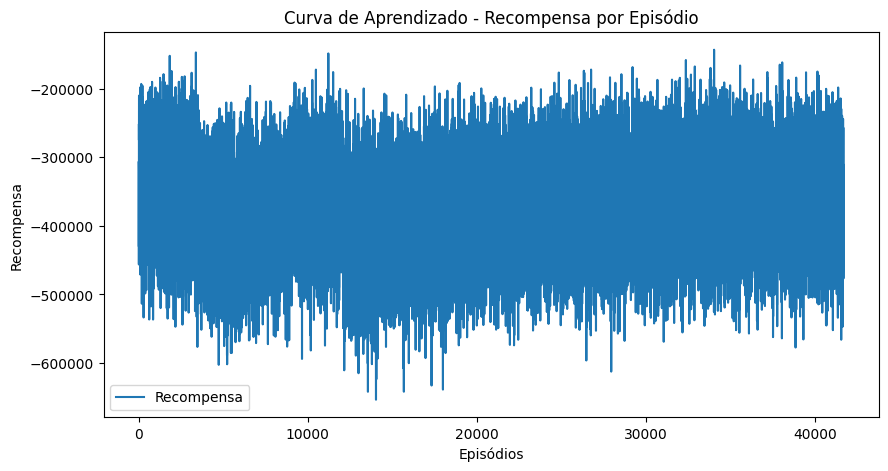

In [21]:
caminho = os.path.abspath(os.path.join(os.getcwd(), "../../", "data", "ppo_training", "obj_3", "complex_scenario", "24000000_time_steps"))
log_data = carregar_log(caminho)
retornos = log_data["r"].values
# Plotar recompensa acumulada por episódio
plotar_recompensa(retornos)

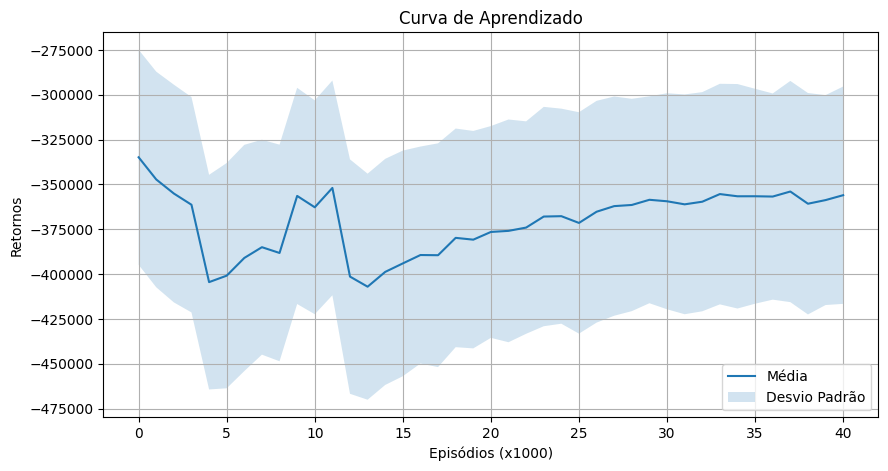

In [22]:
# Calcular a média e o desvio padrão a cada mil episódios
media_1000_episodios, desvio_1000_episodios = calcular_estatisticas_por_janela(retornos, janela=1000)
# Plotar a curva de aprendizado com a média e o desvio padrão
plotar_curva_aprendizado(media_1000_episodios, desvio_1000_episodios)

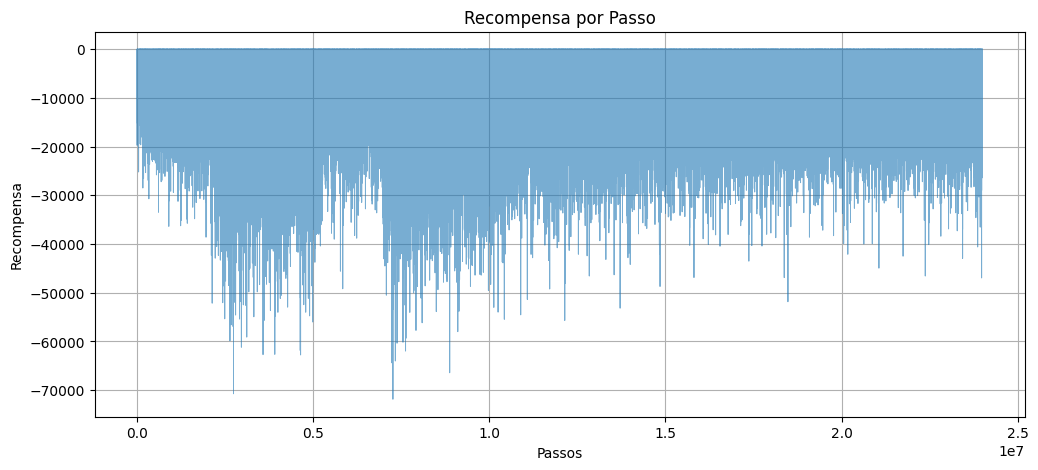

In [23]:
# Plotar a recompensa acumulada por passo
step_rewards_df = carregar_log(caminho, "logs", "step_rewards.csv", 0)
recompensas_por_passo = step_rewards_df["reward"]
plotar_recompensa_por_passo(recompensas_por_passo)

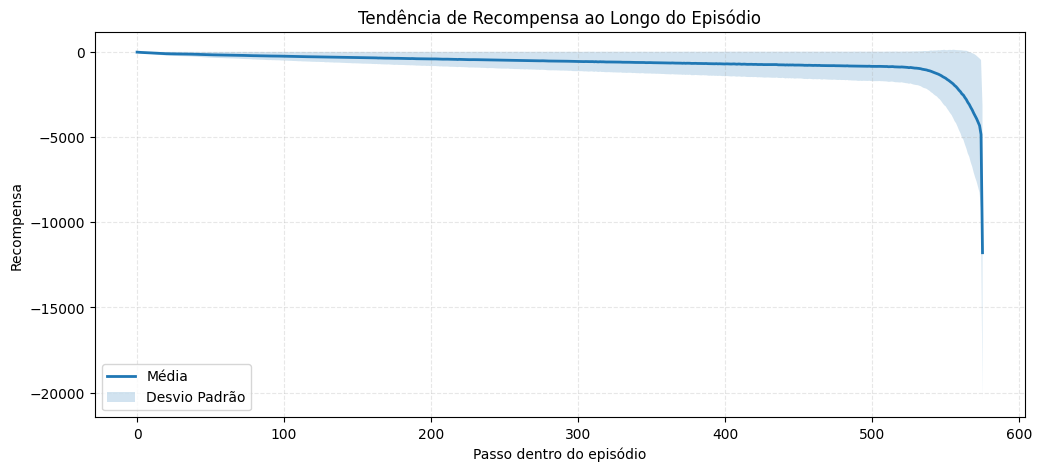

In [24]:
mean_rewards, std_rewards = calcular_tendencia_recompensa_por_passo(recompensas_por_passo.values, tamanho_episodio)
plotar_tendencia_por_passo(mean_rewards, std_rewards)

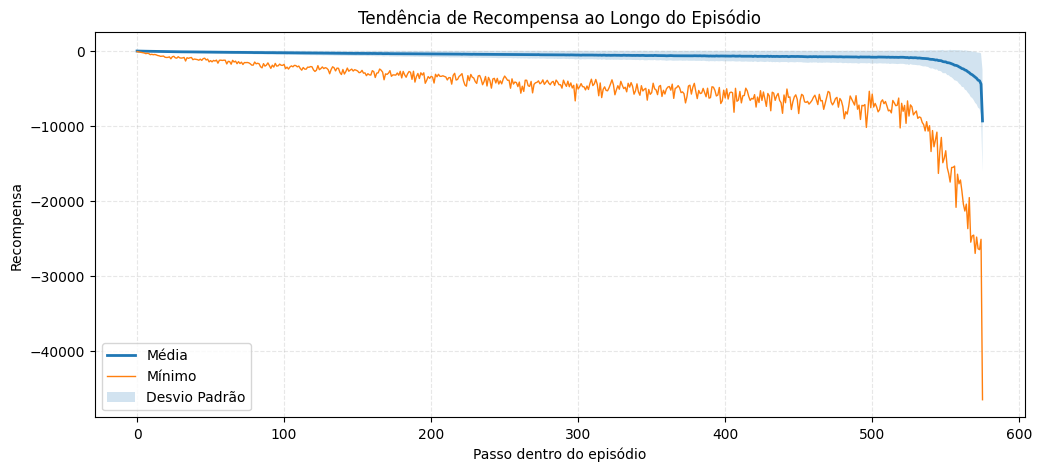

In [25]:
mean_rewards, std_rewards, min_rewards = calcular_estatisticas_em_faixa(recompensas_por_passo.values, tamanho_episodio, 35000, 40000)
plotar_tendencia_com_minimo(mean_rewards, std_rewards, min_rewards)

# **Resultados do Treinamento do PPO no ambiente complexo com o objetivo de recompensa 3 por 30 milhões de passos**

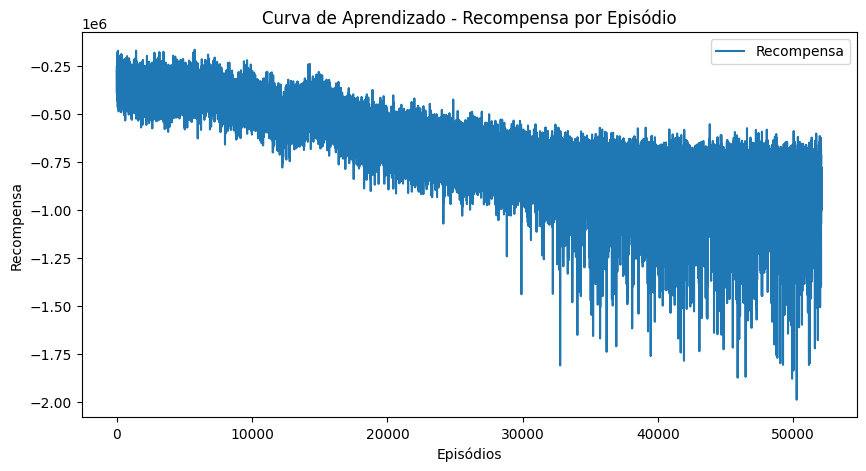

In [26]:
caminho = os.path.abspath(os.path.join(os.getcwd(), "../../", "data", "ppo_training", "obj_3", "complex_scenario", "30000000_time_steps"))
log_data = carregar_log(caminho)
retornos = log_data["r"].values
# Plotar recompensa acumulada por episódio
plotar_recompensa(retornos)

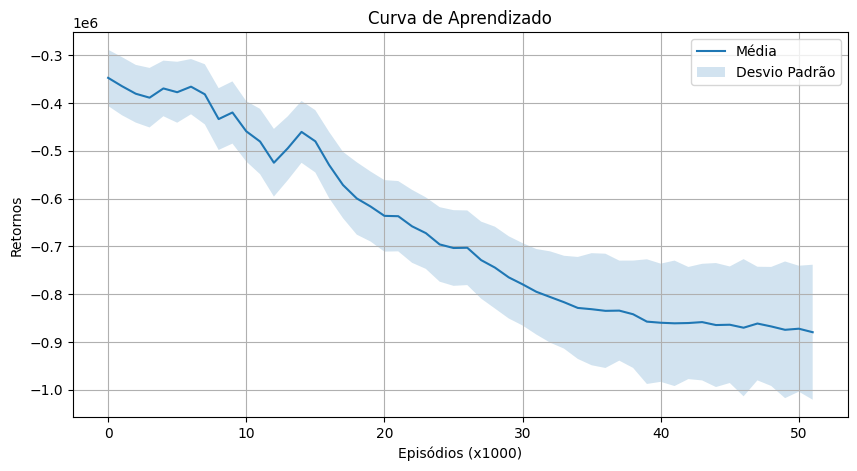

In [27]:
# Calcular a média e o desvio padrão a cada mil episódios
media_1000_episodios, desvio_1000_episodios = calcular_estatisticas_por_janela(retornos, janela=1000)
# Plotar a curva de aprendizado com a média e o desvio padrão
plotar_curva_aprendizado(media_1000_episodios, desvio_1000_episodios)

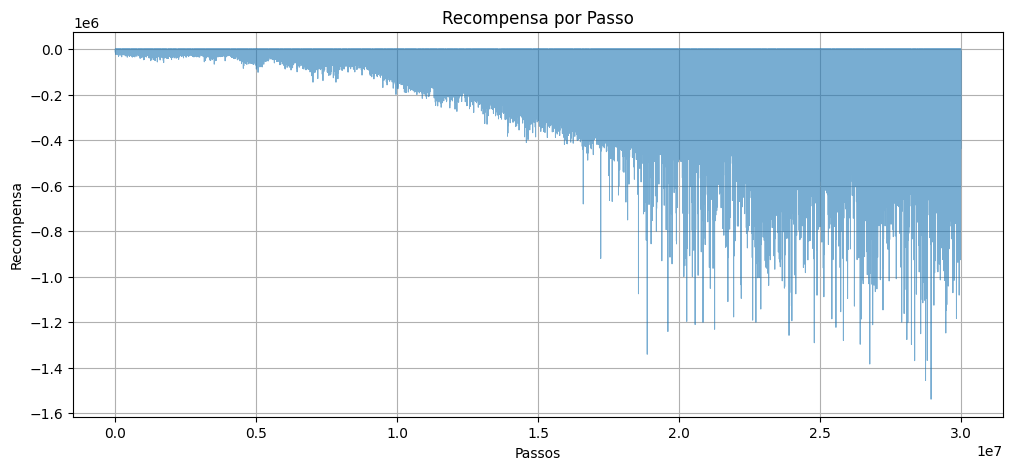

In [28]:
# Plotar a recompensa acumulada por passo
step_rewards_df = carregar_log(caminho, "logs", "step_rewards.csv", 0)
recompensas_por_passo = step_rewards_df["reward"]
plotar_recompensa_por_passo(recompensas_por_passo)

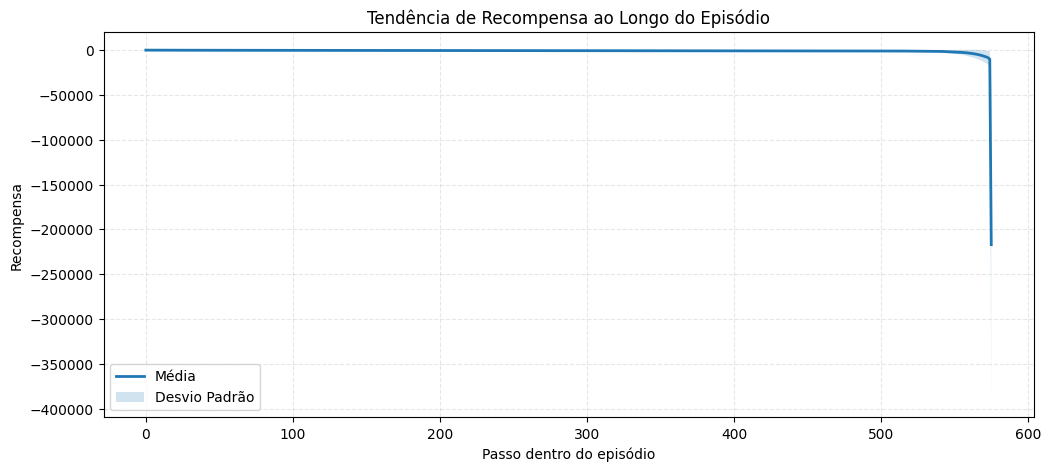

In [29]:
mean_rewards, std_rewards = calcular_tendencia_recompensa_por_passo(recompensas_por_passo.values, tamanho_episodio)
plotar_tendencia_por_passo(mean_rewards, std_rewards)

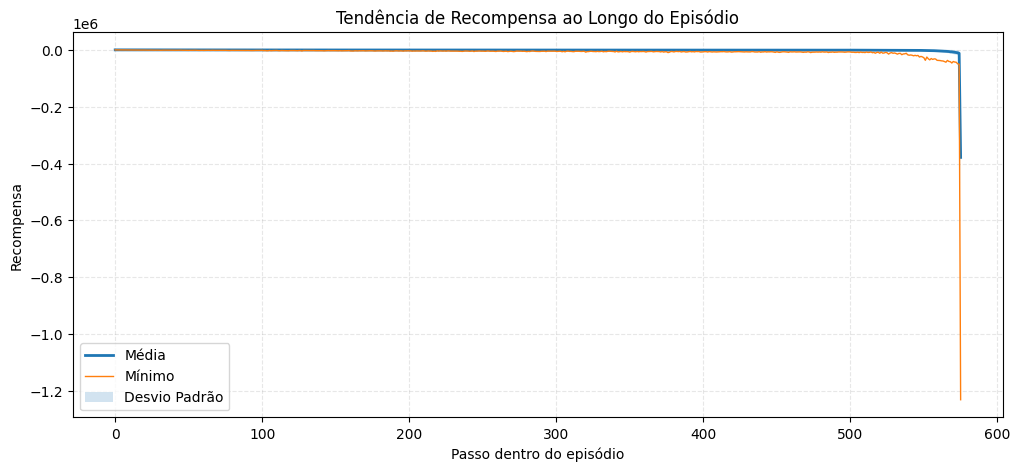

In [31]:
mean_rewards, std_rewards, min_rewards = calcular_estatisticas_em_faixa(recompensas_por_passo.values, tamanho_episodio, 35000, 40000)
plotar_tendencia_com_minimo(mean_rewards, std_rewards, min_rewards)